In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kelixirr/pizza-steak-image-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1


In [10]:
import os
print(os.listdir("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak"))
print(os.listdir("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train"))
print(os.listdir("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/pizza"))

['train', 'test']
['steak', 'pizza']
['2800325.jpg', '1055065.jpg', '3425999.jpg', '1947572.jpg', '1008941.jpg', '829229.jpg', '1054420.jpg', '413710.jpg', '3826377.jpg', '143453.jpg', '809024.jpg', '3324050.jpg', '448519.jpg', '1008104.jpg', '2274117.jpg', '1571074.jpg', '2331467.jpg', '1980167.jpg', '98617.jpg', '3702863.jpg', '674188.jpg', '3193599.jpg', '3214153.jpg', '2486277.jpg', '238843.jpg', '3082443.jpg', '2231356.jpg', '2793535.jpg', '3164761.jpg', '740385.jpg', '3749515.jpg', '495892.jpg', '2021516.jpg', '596494.jpg', '676432.jpg', '384215.jpg', '422261.jpg', '3191035.jpg', '3342039.jpg', '1877103.jpg', '878377.jpg', '2236914.jpg', '3772054.jpg', '2501636.jpg', '1608000.jpg', '2462190.jpg', '2097315.jpg', '1544197.jpg', '1577871.jpg', '618021.jpg', '2811032.jpg', '3168266.jpg', '1870865.jpg', '1584379.jpg', '917774.jpg', '233143.jpg', '175626.jpg', '762788.jpg', '979998.jpg', '403431.jpg', '967694.jpg', '899959.jpg', '2126709.jpg', '1670471.jpg', '2990023.jpg', '1761451.jpg

In [11]:
for dirpath, dirnames, filenames in os.walk("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}'.")

There are 2 directories and 0 images in'/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/'.
There are 2 directories and 0 images in'/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train'.
There are 0 directories and 750 images in'/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/steak'.
There are 0 directories and 750 images in'/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/pizza'.
There are 2 directories and 0 images in'/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/test'.
There are 0 directories and 250 images in'/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/test/steak'.
There are 0 direc

Image shape: (288, 512, 3)


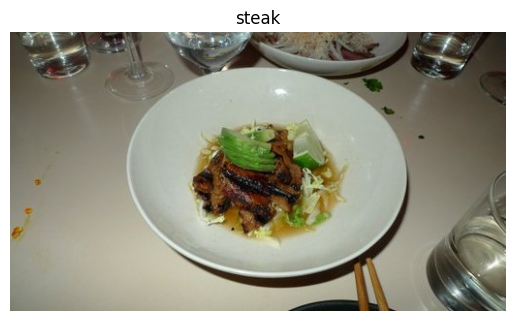

In [12]:
import os
import random  # Add this line to import the 'random' module
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.choice(os.listdir(target_folder))

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    # Show the shape of the image
    print(f"Image shape: {img.shape}")  

    return img

img = view_random_image("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train","steak")

In [13]:
# View array/tensor of the image
img

array([[[ 60,  51,  42],
        [ 65,  56,  47],
        [ 67,  58,  49],
        ...,
        [ 29,  30,  24],
        [ 27,  28,  22],
        [ 27,  28,  22]],

       [[ 61,  52,  43],
        [ 65,  56,  47],
        [ 66,  57,  48],
        ...,
        [ 31,  32,  26],
        [ 30,  31,  25],
        [ 29,  30,  24]],

       [[ 63,  54,  45],
        [ 66,  57,  48],
        [ 67,  58,  49],
        ...,
        [ 33,  34,  26],
        [ 32,  33,  27],
        [ 32,  33,  27]],

       ...,

       [[123, 126, 109],
        [123, 126, 109],
        [125, 128, 111],
        ...,
        [114, 131, 115],
        [121, 139, 123],
        [125, 143, 127]],

       [[122, 125, 108],
        [122, 125, 108],
        [123, 126, 109],
        ...,
        [104, 121, 105],
        [100, 118, 102],
        [101, 119, 103]],

       [[121, 124, 107],
        [122, 125, 108],
        [123, 126, 109],
        ...,
        [127, 144, 128],
        [106, 124, 108],
        [ 97, 115,  99]]

## CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Data preprocessing (scaling and normalization)
datagen = ImageDataGenerator(rescale=1/255.)

# Directories
train_dir = "/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/"
test_dir = "/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/test/"

# Data generators
batch_size = 32
image_size = (224, 224)
class_mode = 'binary'
train_data = datagen.flow_from_directory(train_dir, batch_size=batch_size, target_size=image_size, class_mode=class_mode, seed=42)
valid_data = datagen.flow_from_directory(test_dir, batch_size=batch_size, target_size=image_size, class_mode=class_mode, seed=42)

# Create a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
epochs = 5
history_1 = model_1.fit(train_data, epochs=epochs, validation_data=valid_data, validation_steps=len(valid_data))

2026-01-22 10:44:17.379299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769096657.479011    1493 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769096657.511097    1493 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769096657.705017    1493 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769096657.705053    1493 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769096657.705058    1493 computation_placer.cc:177] computation placer alr

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1769096663.131713    1493 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6692 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


Epoch 1/5


/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1769096665.249642    1620 service.cc:152] XLA service 0x71d4a80062c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769096665.249690    1620 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1070 Ti, Compute Capability 6.1
2026-01-22 10:44:25.299438: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1769096665.579745    1620 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-22 10:44:26.346983: I ex

 4/47 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5065 - loss: 0.6824

I0000 00:00:1769096669.629826    1620 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 8/47 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5389 - loss: 0.6743

2026-01-22 10:44:30.664826: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.12 = (f32[28,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,3,224,224]{3,2,1,0} %bitcast.2284, f32[10,3,3,3]{3,2,1,0} %bitcast.2291, f32[10]{0} %bitcast.2801), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2026-01-22 10:44:31.022580: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted pote

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.6148 - loss: 0.6307

2026-01-22 10:44:37.076353: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.12 = (f32[32,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0} %bitcast.416, f32[10,3,3,3]{3,2,1,0} %bitcast.423, f32[10]{0} %bitcast.425), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2026-01-22 10:44:37.454862: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potenti

47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.6159 - loss: 0.6300 - val_accuracy: 0.7940 - val_loss: 0.4684
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7954 - loss: 0.4728 - val_accuracy: 0.8300 - val_loss: 0.4029
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8179 - loss: 0.4167 - val_accuracy: 0.8500 - val_loss: 0.3726
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8186 - loss: 0.4261 - val_accuracy: 0.8540 - val_loss: 0.3554
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8478 - loss: 0.3530 - val_accuracy: 0.8500 - val_loss: 0.3669


In [2]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## FNN

In [3]:
#set random seed
tf.random.set_seed(42)

#Create a simple FNN model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])


#compile the model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
history_2 = model_2.fit(train_data, epochs=5, validation_data = valid_data)

Epoch 1/5


/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5004 - loss: 0.9127 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4860 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4867 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5119 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4908 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [4]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [5]:
#set random seed
tf.random.set_seed(42)

#Create a simple FNN model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])


#compile the model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.5095 - loss: 1.6766 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [6]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,485 (6.89 MB)

 Trainable params: 602,161 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,324 (4.59 MB)

Image shape: (306, 512, 3)
Image shape: (512, 512, 3)


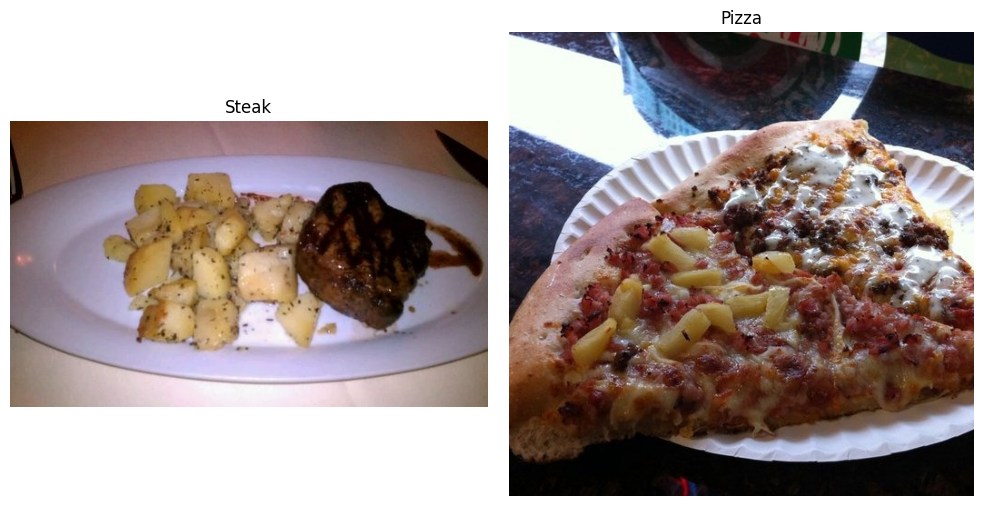

In [17]:
# Visualize data by displaying random images
plt.figure(figsize=(10, 5))  # Create a figure with a specified size

# Visualize a random steak image
plt.subplot(1, 2, 1)
steak_img = view_random_image("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/", "steak")
plt.title("Steak")

# Visualize a random pizza image
plt.subplot(1, 2, 2)
pizza_img = view_random_image("/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/", "pizza")
plt.title("Pizza")

plt.tight_layout()  # Ensure the subplots don't overlap
plt.show()  # Display the figure

In [19]:
#Preprocess

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define training and test directory paths
train_dir = "/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train/"
test_dir = "/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/test/"

# Create data generators with data rescaling
datagen = ImageDataGenerator(rescale=1/255.)

# Define common parameters for both data generators
batch_size = 32
image_size = (224, 224)
class_mode = 'binary'

# Create training and test data generators
train_data = datagen.flow_from_directory(directory=train_dir,
                                         target_size=image_size,
                                         class_mode=class_mode,
                                         batch_size=batch_size)

test_data = datagen.flow_from_directory(directory=test_dir,
                                       target_size=image_size,
                                       class_mode=class_mode,
                                       batch_size=batch_size)

# Extract a batch of training data
images, labels = next(train_data)
num_images = len(images)
num_labels = len(labels)
print(f"Get the next batch of images: {num_images}, Get the next batch of labels: {num_images}")


# Get the first two images and their shape
sample_images = images[:2]
sample_image_shape = sample_images[0].shape

print("first two images:",sample_images)
print("image shape ",sample_image_shape)

Found 1500 images belonging to 2 classes.


Found 500 images belonging to 2 classes.
Get the next batch of images: 32, Get the next batch of labels: 32
first two images: [[[[0.56078434 0.63529414 0.79215693]
   [0.5647059  0.6392157  0.7960785 ]
   [0.5647059  0.6392157  0.80392164]
   ...
   [0.07843138 0.08235294 0.05882353]
   [0.08235294 0.08235294 0.07450981]
   [0.09803922 0.09803922 0.09803922]]

  [[0.5647059  0.6392157  0.7960785 ]
   [0.5568628  0.6313726  0.7960785 ]
   [0.5568628  0.6313726  0.7960785 ]
   ...
   [0.09803922 0.10196079 0.07058824]
   [0.0627451  0.06666667 0.04705883]
   [0.04313726 0.04313726 0.03529412]]

  [[0.5686275  0.6431373  0.8078432 ]
   [0.5647059  0.6392157  0.80392164]
   [0.5647059  0.6392157  0.8078432 ]
   ...
   [0.07450981 0.07843138 0.04705883]
   [0.15686275 0.16078432 0.13725491]
   [0.21568629 0.21960786 0.20000002]]

  ...

  [[0.3921569  0.34901962 0.22352943]
   [0.39607847 0.3529412  0.23529413]
   [0.3372549  0.28235295 0.1764706 ]
   ...
   [0.5372549  0.5294118  0.5803922

## Create CNN

In [21]:
# Making the model with an easier way 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
     
# Create the model with a 3-layer convolutional neural network
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224,224,3)), # input layer
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)
])
     
# Compile the model
model_4.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
len(train_data), len(test_data)

(47, 16)

In [23]:
from numpy.ma import test
#Fit the model
history_4 =model_4.fit(train_data,
                       epochs =5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps= len(test_data))

/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


2026-01-22 10:55:44.030076: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.11 = (f32[32,10,218,218]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,220,220]{3,2,1,0} %bitcast.2121, f32[10,10,3,3]{3,2,1,0} %bitcast.1611, f32[10]{0} %bitcast.2181), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_3_1/conv2d_6_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


13/47 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5457 - loss: 3.4977

2026-01-22 10:55:47.999839: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.11 = (f32[28,10,218,218]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,10,220,220]{3,2,1,0} %bitcast.2121, f32[10,10,3,3]{3,2,1,0} %bitcast.1611, f32[10]{0} %bitcast.2181), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_3_1/conv2d_6_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5836 - loss: 2.0643

2026-01-22 10:55:53.729605: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.11 = (f32[32,10,218,218]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,220,220]{3,2,1,0} %bitcast.390, f32[10,10,3,3]{3,2,1,0} %bitcast.397, f32[10]{0} %bitcast.399), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_3_1/conv2d_6_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2026-01-22 10:55:55.428630: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted p

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.5849 - loss: 2.0447 - val_accuracy: 0.7700 - val_loss: 0.4719
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7940 - loss: 0.4630 - val_accuracy: 0.8020 - val_loss: 0.4358
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8417 - loss: 0.3853 - val_accuracy: 0.8340 - val_loss: 0.3615
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9018 - loss: 0.2543 - val_accuracy: 0.8480 - val_loss: 0.3510
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9608 - loss: 0.1641 - val_accuracy: 0.8480 - val_loss: 0.3365


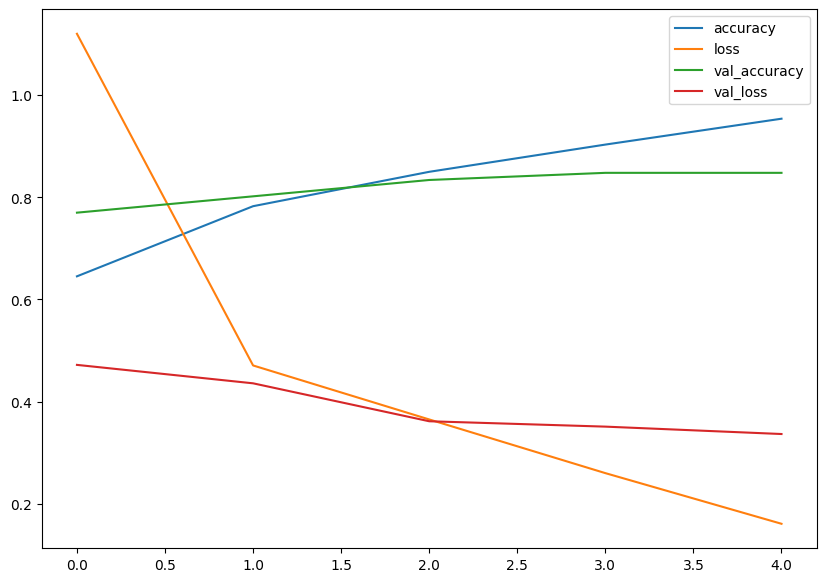

In [24]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize =(10,7));

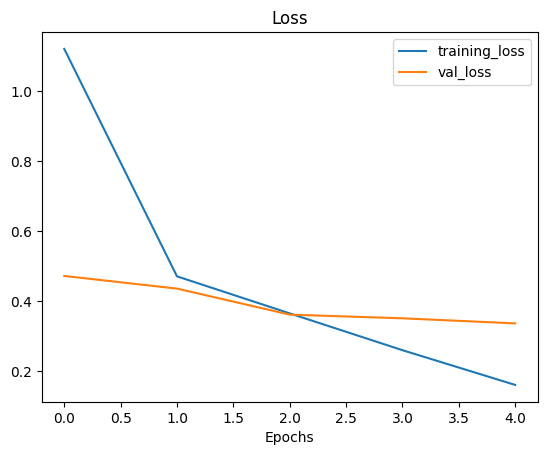

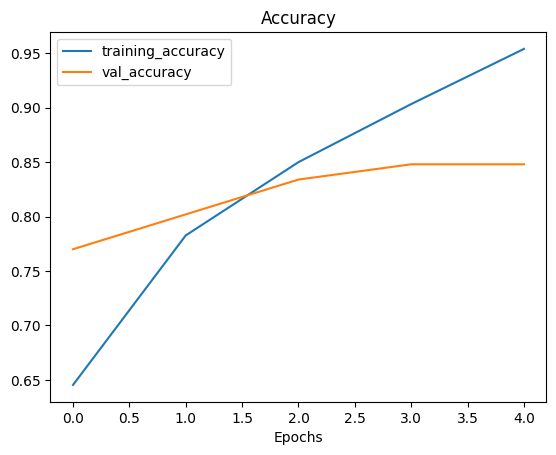

In [26]:
#plot the validation and training data separately
def plot_loss_curves(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_4)

In [27]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create the model (3-layer CNN)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2026-01-22 10:57:17.742431: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.10 = (f32[32,10,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,111,111]{3,2,1,0} %bitcast.2698, f32[10,10,3,3]{3,2,1,0} %bitcast.2123, f32[10]{0} %bitcast.2758), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_4_1/conv2d_8_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2026-01-22 10:57:17.918224: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitte

11/47 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5590 - loss: 0.6864

2026-01-22 10:57:20.875417: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.10 = (f32[28,10,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,10,111,111]{3,2,1,0} %bitcast.2701, f32[10,10,3,3]{3,2,1,0} %bitcast.2126, f32[10]{0} %bitcast.2761), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_4_1/conv2d_8_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2026-01-22 10:57:21.011687: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitte

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6345 - loss: 0.6405

2026-01-22 10:57:25.945712: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.10 = (f32[32,10,109,109]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,111,111]{3,2,1,0} %bitcast.406, f32[10,10,3,3]{3,2,1,0} %bitcast.413, f32[10]{0} %bitcast.415), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_4_1/conv2d_8_1/convolution" source_file="/home/wanglab/miniconda3/envs/tf-wsl/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2026-01-22 10:57:26.095727: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted p

47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.6359 - loss: 0.6394 - val_accuracy: 0.8060 - val_loss: 0.4617
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7756 - loss: 0.4970 - val_accuracy: 0.8320 - val_loss: 0.3913
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8098 - loss: 0.4358 - val_accuracy: 0.8340 - val_loss: 0.4025
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7937 - loss: 0.4394 - val_accuracy: 0.8440 - val_loss: 0.3738
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8270 - loss: 0.4084 - val_accuracy: 0.8140 - val_loss: 0.3940


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

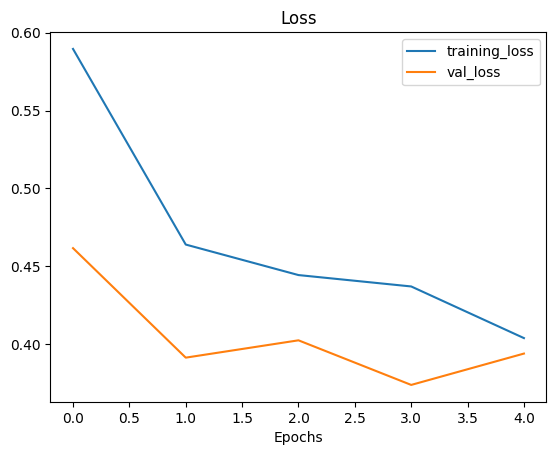

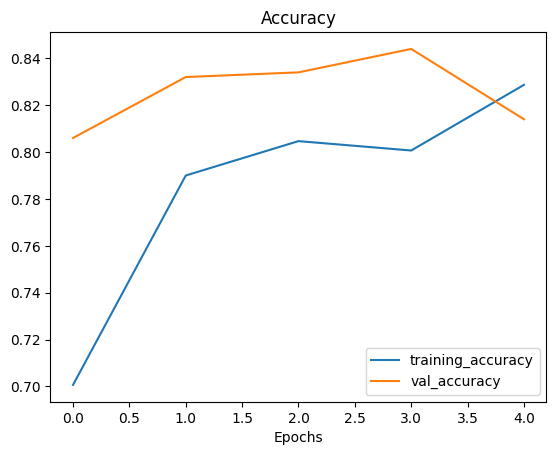

In [30]:
model_5.summary()
plot_loss_curves(history_5)

In [92]:
# Print all layer names in model_5 to find the correct last conv layer name
for i, layer in enumerate(model_5.layers):
    print(f"Layer {i}: {layer.name} ({layer.__class__.__name__})")

Layer 0: conv2d_7 (Conv2D)
Layer 1: max_pooling2d_2 (MaxPooling2D)
Layer 2: conv2d_8 (Conv2D)
Layer 3: max_pooling2d_3 (MaxPooling2D)
Layer 4: conv2d_9 (Conv2D)
Layer 5: max_pooling2d_4 (MaxPooling2D)
Layer 6: flatten_4 (Flatten)
Layer 7: dense_9 (Dense)


In [31]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale =1/255.,
                                             rotation_range =20,
                                             shear_range =0.2, 
                                             zoom_range =0.2,
                                             width_shift_range =0.2,
                                             height_shift_range =0.2,
                                             horizontal_flip= True
                                             )

#create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale =1/255.)

#create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [46]:
#Import data and augment it from training directory
print("Augmented training images: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size =(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle =False
                                                                   )

#create non- augmented  data batches
print("Non-augmented training images")
train_data = train_datagen.flow_from_directory(test_dir,
                                               target_size =(224,224),
                                               batch_size =32,
                                               class_mode='binary',
                                               shuffle = False
                                               )

print("Unchanged test images: ")
test_data =test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode ='binary'
                                            )

Augmented training images: 
Found 1500 images belonging to 2 classes.


Non-augmented training images
Found 500 images belonging to 2 classes.
Unchanged test images: 
Found 500 images belonging to 2 classes.


In [47]:
#Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

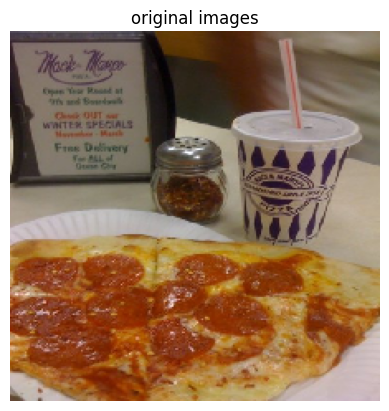

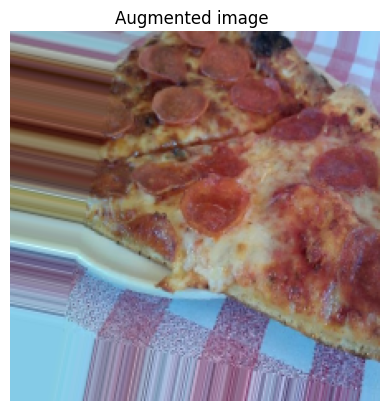

In [48]:
#show original images and augmented image
random_number = random.randint(0,32) #we are making batches of size 32
plt.imshow(images[random_number])
plt.title(f"original images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image ")
plt.axis(False);

In [49]:
#create the model6 (same as model_5)
model_6 = Sequential([
    Conv2D(10,3, activation= 'relu', input_shape =(224,224,3)),
    MaxPool2D(pool_size=2), #reduce number of feature by half
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy']
                )

#Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 298ms/step - accuracy: 0.5477 - loss: 0.7106 - val_accuracy: 0.5300 - val_loss: 0.6915
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 254ms/step - accuracy: 0.5894 - loss: 0.6808 - val_accuracy: 0.6840 - val_loss: 0.6838
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.5185 - loss: 0.6929 - val_accuracy: 0.6100 - val_loss: 0.6892
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 270ms/step - accuracy: 0.5141 - loss: 0.6896 - val_accuracy: 0.5020 - val_loss: 0.6772
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.6338 - loss: 0.6458 - val_accuracy: 0.7300 - val_loss: 0.6170


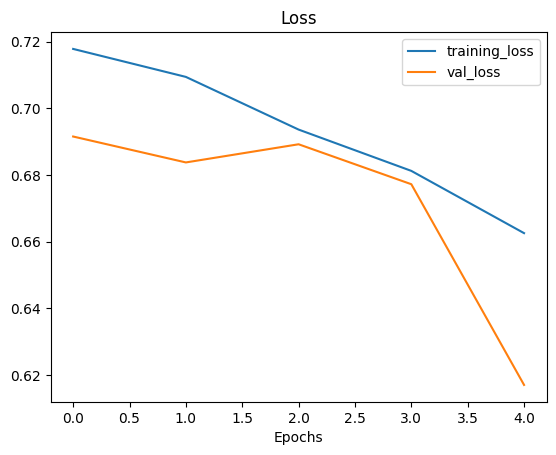

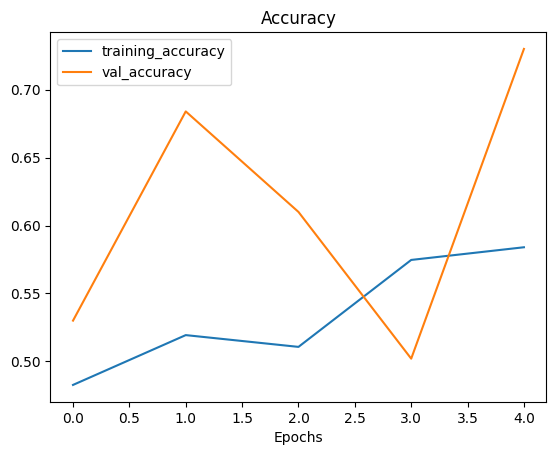

In [50]:
plot_loss_curves(history_6)

In [54]:
#import data and augment it form directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size =(224,224),
                                                                            batch_size =32,
                                                                            class_mode='binary',
                                                                            shuffle =True
                                                                            ) #shuffle data

Found 1500 images belonging to 2 classes.


In [55]:
model_7 = Sequential([
    Conv2D(10,3, activation= 'relu', input_shape =(224,224,3)),
    MaxPool2D(pool_size=2), #reduce number of feature by half
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy']
                )

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 519ms/step - accuracy: 0.5691 - loss: 0.6700 - val_accuracy: 0.6640 - val_loss: 0.5832
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 454ms/step - accuracy: 0.6704 - loss: 0.5781 - val_accuracy: 0.8180 - val_loss: 0.3952
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 455ms/step - accuracy: 0.7928 - loss: 0.4453 - val_accuracy: 0.8680 - val_loss: 0.3369
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 634ms/step - accuracy: 0.7997 - loss: 0.4546 - val_accuracy: 0.8580 - val_loss: 0.3452
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 511ms/step - accuracy: 0.7919 - loss: 0.4465 - val_accuracy: 0.8660 - val_loss: 0.3289


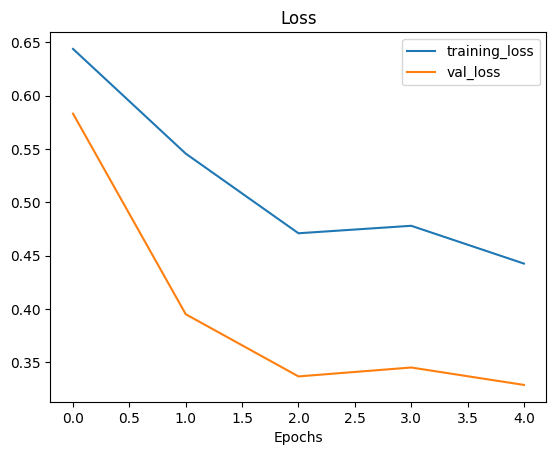

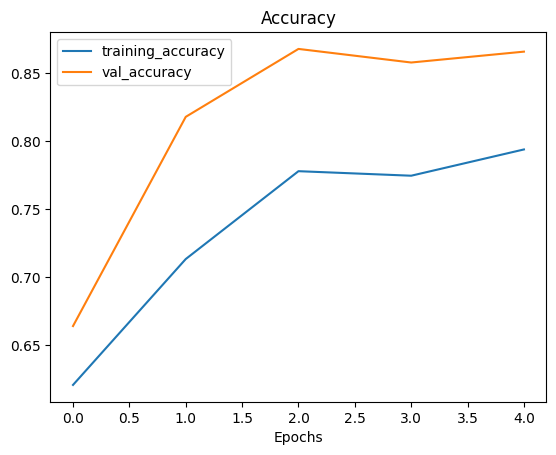

In [56]:
plot_loss_curves(history_7)

## Predictions with Model 5

In [70]:
# Get the class names programmatically
import pathlib
import numpy as np
#turn our training path into a python path
data_dir= pathlib.Path('/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/train')
#created a classnames from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [59]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mostafizur1997/steak-image")

print("Path to dataset files:", path)

100%|██████████| 1.88M/1.88M [00:00<00:00, 21.0MB/s]

Extracting files...
Path to dataset files: /home/wanglab/.cache/kagglehub/datasets/mostafizur1997/steak-image/versions/1


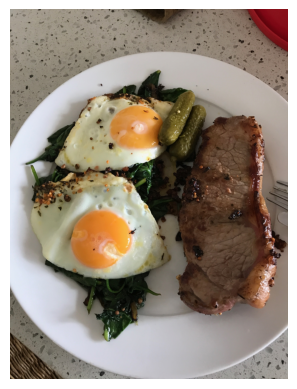

In [62]:
steak = mpimg.imread("/home/wanglab/.cache/kagglehub/datasets/mostafizur1997/steak-image/versions/1/steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [63]:
steak.shape

(4032, 3024, 3)

In [64]:
# create a function to import an image and resize it 
def load_and_prep_image(filename, img_shape=224):
 
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [65]:
#load in and preprocess our data 
steak=load_and_prep_image('/home/wanglab/.cache/kagglehub/datasets/mostafizur1997/steak-image/versions/1/steak.jpeg')

In [66]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [67]:
# using tf.expand_dims
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [71]:
# prediction on custom image tensor
pred = model_5.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.9287072]], dtype=float32)

In [72]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


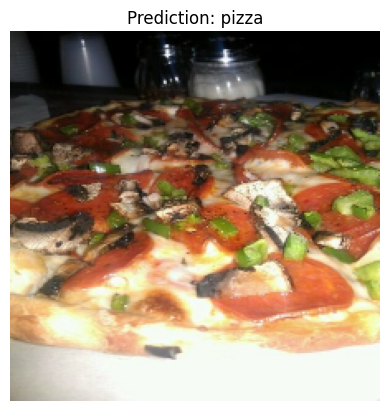

In [ ]:
#test our model 
# Use the correct local path for the test image
pred_and_plot(model_5, "/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/test/pizza/1180001.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


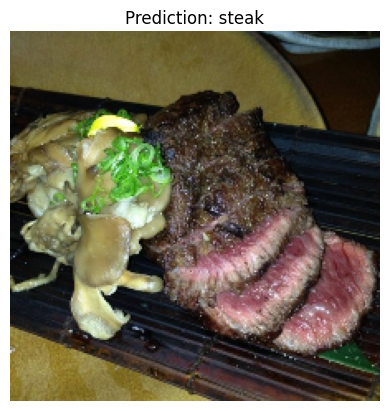

In [77]:
pred_and_plot(model_5, "/home/wanglab/.cache/kagglehub/datasets/kelixirr/pizza-steak-image-classification-dataset/versions/1/pizza_steak/test/steak/1206166.jpg", class_names)